<a href="https://colab.research.google.com/github/2303A51528/ieee/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Imports and Setup
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # For headless environments
import matplotlib.pyplot as plt
plt.switch_backend('Agg')

import seaborn as sns

# Ensure inline plotting in notebooks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set a seaborn theme for the plots
sns.set(style='whitegrid')

In [9]:
# Load the CSV file from the extracted directory
csv_file_path = '/content/extracted_data/electric_vehicles_dataset.csv'
df = pd.read_csv(csv_file_path, encoding='utf-8', delimiter=',')

# Display the first few rows of the dataset
display(df.head())

,Vehicle_ID,Manufacturer,Model,Year,Battery_Type,Battery_Capacity_kWh,Range_km,Charging_Type,Charge_Time_hr,Price_USD,Color,Country_of_Manufacture,Autonomous_Level,CO2_Emissions_g_per_km,Safety_Rating,Units_Sold_2024,Warranty_Years
0,1,Acura,ZDX (with GM Ultium),2015,Lithium-titanate,55.8,214,CHAdeMO,9.0,111203.94,Matte White,UK,0.0,NaN,5.0,19726,3
1,2,Lamborghini,Revuelto (PHEV),2025,Lithium-titanate,90.8,212,Vehicle-to-Home (V2H),7.3,127131.65,White,Netherlands,2.0,0.0,4.0,3349,3
2,3,NIO,ET7,2020,Calcium-ion,64.7,235,Level 2 Charging,8.9,94347.37,Beige,UK,5.0,0.0,5.0,6300,5
3,4,Audi,e-tron,2025,Lithium-iron phosphate,120.5,140,Ultra-Fast Charging (350 kW+),10.5,75615.15,Sunset Orange,Argentina,2.0,0.0,5.0,2339,5
4,5,Acura,ZDX (with GM Ultium),2023,Lithium-titanate,51.8,336,Plug-in Hydrogen Refueling,3.6,141046.94,Ice Silver,United Arab Emirates,2.0,0.0,3.0,1051,4


In [7]:
import zipfile
import os

zip_file_path = '/content/archive (2).zip'
extracted_path = '/content/extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Zip file extracted to: {extracted_path}")

Zip file extracted to: /content/extracted_data


In [10]:
# Check info and data types
df.info()

# Check the shape of the dataset
print('Dataset shape:', df.shape)

# Let's look into missing values in each column
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              3022 non-null   int64  
 1   Manufacturer            3022 non-null   object 
 2   Model                   3022 non-null   object 
 3   Year                    3022 non-null   int64  
 4   Battery_Type            3022 non-null   object 
 5   Battery_Capacity_kWh    3022 non-null   float64
 6   Range_km                3022 non-null   int64  
 7   Charging_Type           3022 non-null   object 
 8   Charge_Time_hr          3022 non-null   float64
 9   Price_USD               3022 non-null   float64
 10  Color                   3022 non-null   object 
 11  Country_of_Manufacture  3022 non-null   object 
 12  Autonomous_Level        2580 non-null   float64
 13  CO2_Emissions_g_per_km  2430 non-null   float64
 14  Safety_Rating           2685 non-null   

In [11]:
# Fill or drop missing values as necessary
# For simplicity, we fill numeric missing values with the median and categorical with the mode
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f'Filled missing values in numeric column {col} with median: {median_value}')

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f'Filled missing values in categorical column {col} with mode: {mode_value}')

# Verify that there are no remaining missing values
print('Remaining missing values:')
print(df.isnull().sum())

Filled missing values in numeric column Autonomous_Level with median: 3.0
Filled missing values in numeric column CO2_Emissions_g_per_km with median: 0.0
Filled missing values in numeric column Safety_Rating with median: 4.0
Remaining missing values:
Vehicle_ID                0
Manufacturer              0
Model                     0
Year                      0
Battery_Type              0
Battery_Capacity_kWh      0
Range_km                  0
Charging_Type             0
Charge_Time_hr            0
Price_USD                 0
Color                     0
Country_of_Manufacture    0
Autonomous_Level          0
CO2_Emissions_g_per_km    0
Safety_Rating             0
Units_Sold_2024           0
Warranty_Years            0
dtype: int64


,Vehicle_ID,Year,Battery_Capacity_kWh,Range_km,Charge_Time_hr,Price_USD,Autonomous_Level,CO2_Emissions_g_per_km,Safety_Rating,Units_Sold_2024,Warranty_Years
count,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.0,3022.000000,3022.000000,3022.000000
mean,1511.500000,2020.019523,84.314692,349.901059,6.212045,90611.906760,2.589676,0.0,3.995698,10207.072799,3.997353
std,872.520582,3.132083,37.210461,145.406139,3.350597,34654.533838,1.592476,0.0,0.772531,5771.619003,0.821746
min,1.000000,2015.000000,20.000000,100.000000,0.500000,30014.460000,0.000000,0.0,3.000000,6.000000,3.000000
25%,756.250000,2017.000000,52.425000,222.000000,3.300000,61257.390000,1.000000,0.0,3.000000,5145.500000,3.000000
50%,1511.500000,2020.000000,83.600000,347.000000,6.200000,90929.705000,3.000000,0.0,4.000000,10350.000000,4.000000
75%,2266.750000,2023.000000,115.800000,478.000000,9.100000,120199.842500,4.000000,0.0,5.000000,15128.000000,5.000000
max,3022.000000,2025.000000,150.000000,600.000000,12.000000,149978.530000,5.000000,0.0,5.000000,19996.000000,5.000000


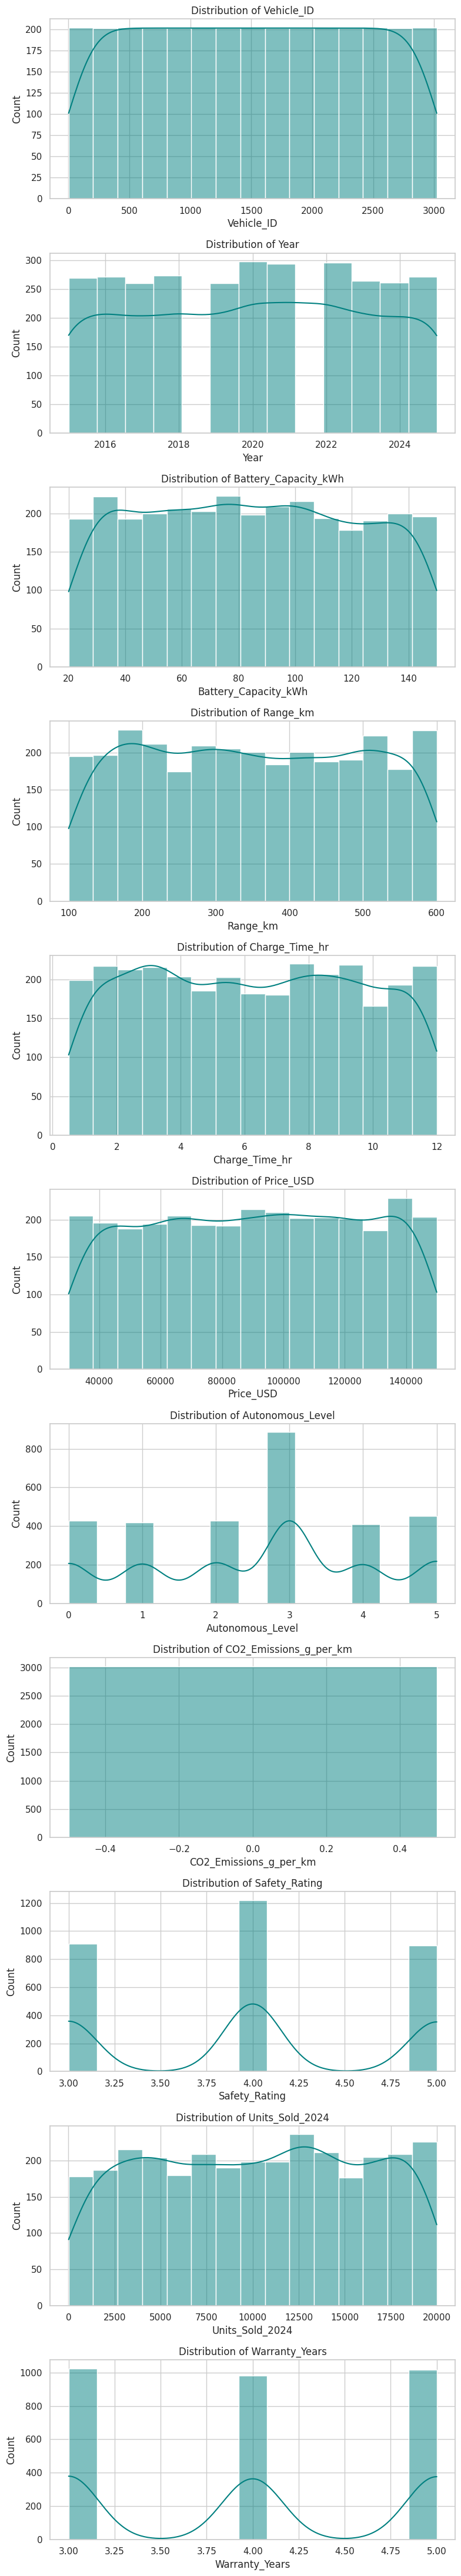

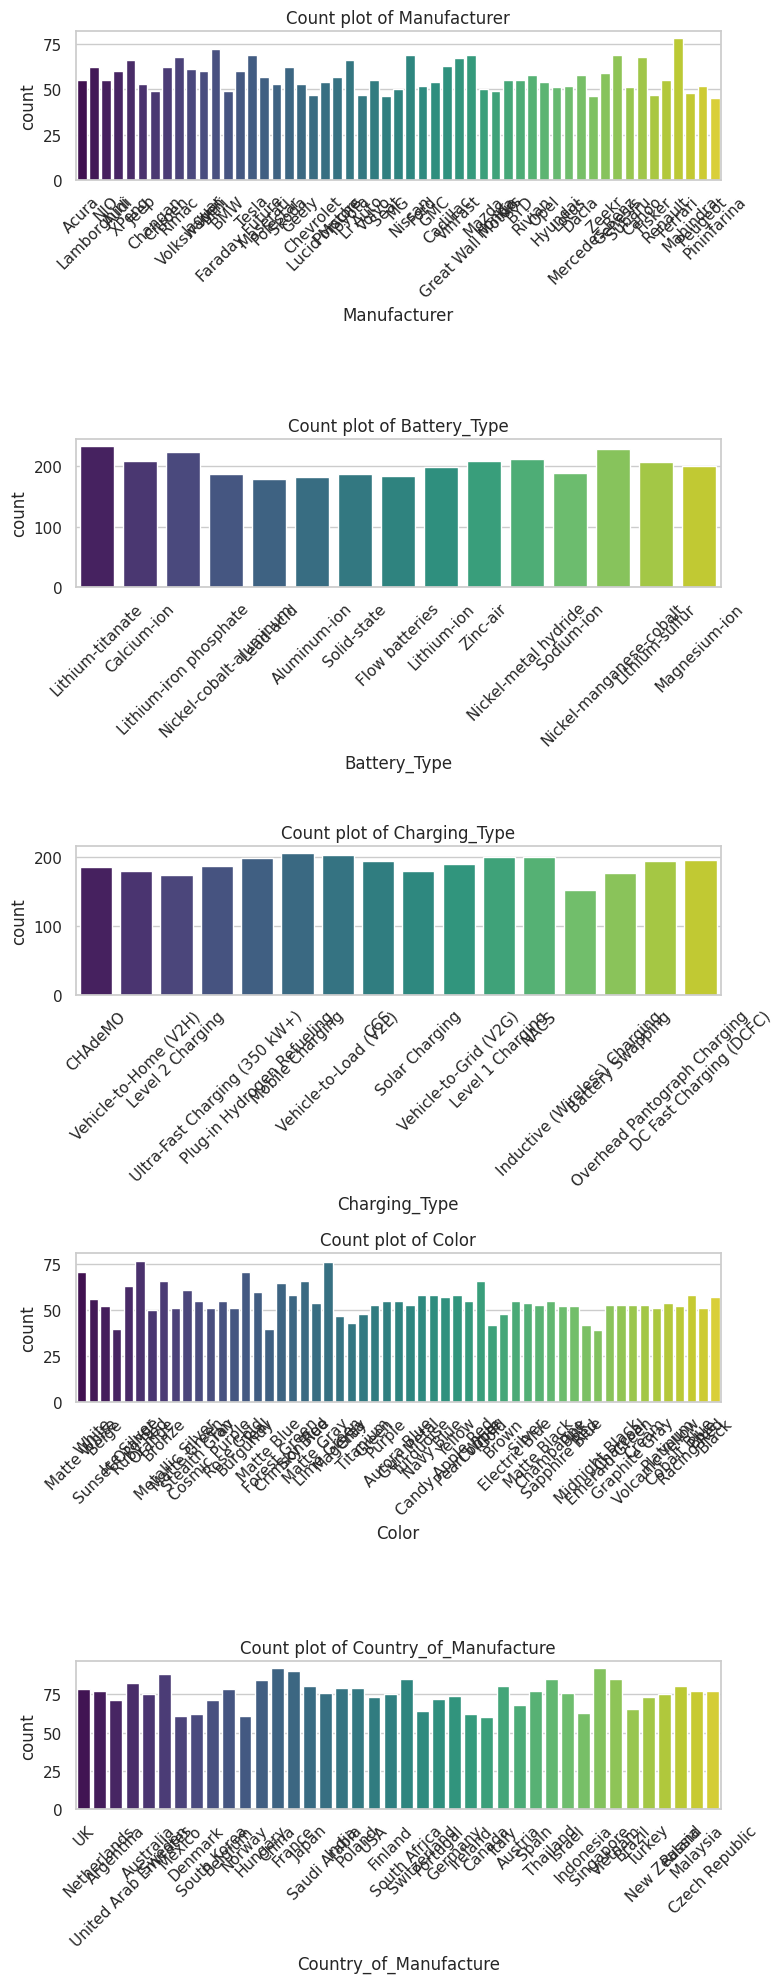

In [12]:
# A quick summary of the dataset statistics
display(df.describe())

# Plotting distributions for numeric features using histograms
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 4*len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i], kde=True, color='teal')
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Count plots for some categorical features
categorical_features = ['Manufacturer', 'Battery_Type', 'Charging_Type', 'Color', 'Country_of_Manufacture']
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(8, 4*len(categorical_features)))
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Count plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

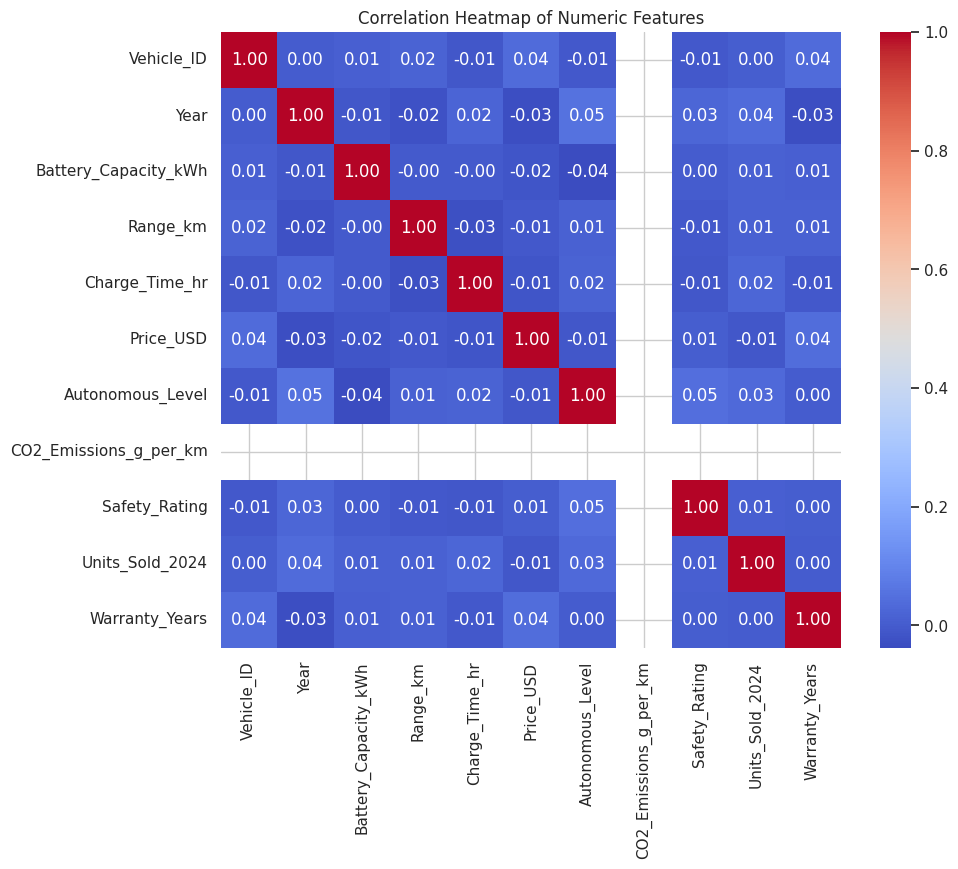

In [13]:
# If there are 4 or more numeric columns, display a correlation heatmap
if len(numeric_cols) >= 4:
    corr = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

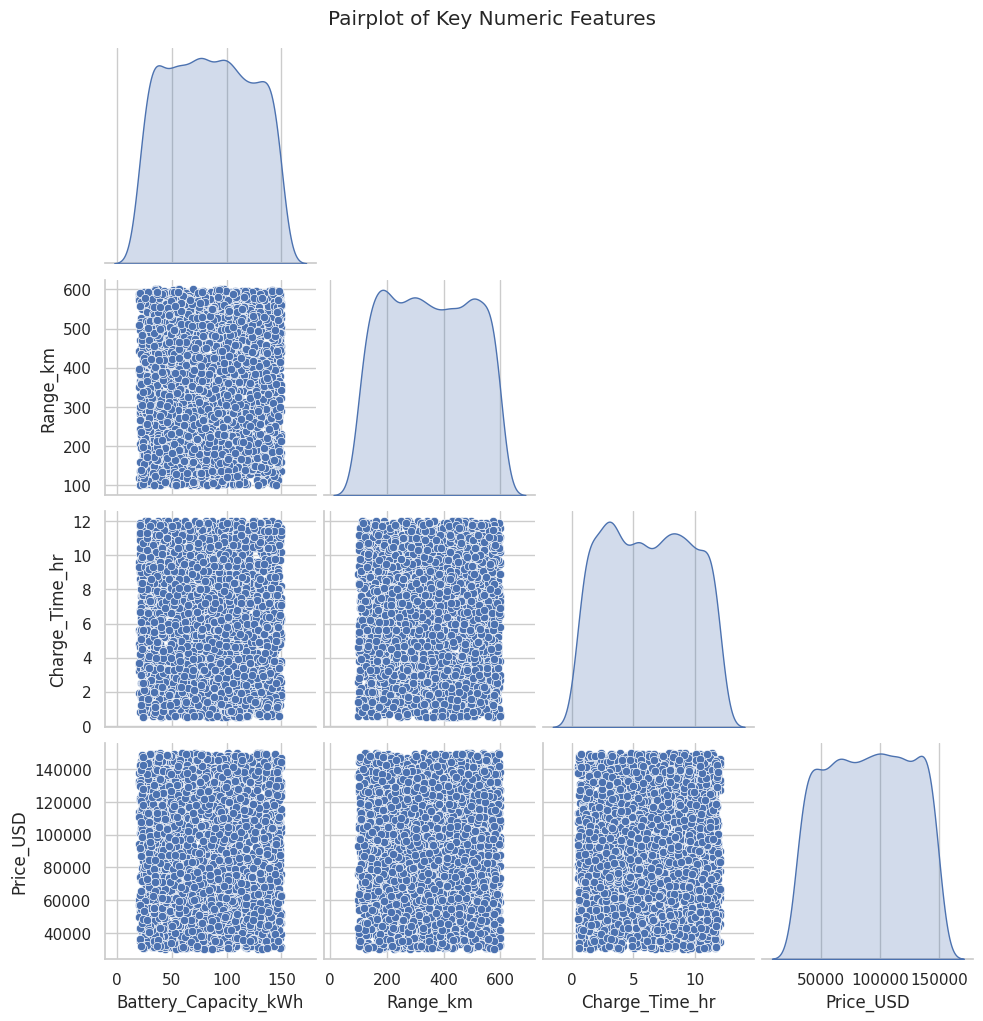

In [14]:
# Pairplot across a subset of features to see pairwise relationships
pairplot_features = ['Battery_Capacity_kWh', 'Range_km', 'Charge_Time_hr', 'Price_USD']
sns.pairplot(df[pairplot_features], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Numeric Features', y=1.02)
plt.show()

In [15]:
# For the predictor, let's choose Price_USD as the target variable.
# We will use numeric features and encode a few categorical features.

# First, select predictor and target columns
target = 'Price_USD'

# We'll choose a subset of features that are likely to influence price
features = ['Year', 'Battery_Capacity_kWh', 'Range_km', 'Charge_Time_hr', 'Autonomous_Level', 'Safety_Rating', 'Units_Sold_2024', 'Warranty_Years']

# Additionally, incorporate a categorical variable such as Manufacturer using one-hot encoding
df_model = df[features + ['Manufacturer']].copy()
df_model = pd.get_dummies(df_model, columns=['Manufacturer'], drop_first=True)

# Define X and y
X = df_model.drop(target, axis=1, errors='ignore')
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Model R-squared Score: {r2:.2f}")

Linear Regression Model R-squared Score: -0.05
